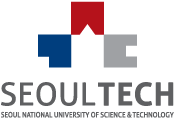

# Midterm examination
---

by Prof. Josué Obregón <br>
Data Analysis for Electronic Manufacturing <br>
Department of Data Science - SeoulTech<br>

## Instructions

You have just beign hired by a steel plate manufacturing company. You have been given a dataset of steel plates' faults, classified into 7 different types.

The dataset consists of 27 features describing each fault (location, size, ...) and 1 feature indicating the type of fault (Class).

You have to perform some specific data analysis and get 4 visualizations and a summarization table. Each visualization will help you to understand the data and it might require you to do some data manipulation before generating the visualization.

But first, let's run the first two cells to load our data.

In [86]:
from sklearn.datasets import fetch_openml
import pandas as pd
import seaborn as sns

In [113]:
raw_data = fetch_openml(data_id='40982', as_frame=True, parser='pandas')
data = raw_data['frame']
data.columns = ['X_Minimum', 'X_Maximum', 'Y_Minimum','Y_Maximum','Pixels_Areas','X_Perimeter','Y_Perimeter','Sum_of_Luminosity','Minimum_of_Luminosity','Maximum_of_Luminosity','Length_of_Conveyer',
                'TypeOfSteel_A300','TypeOfSteel_A400','Steel_Plate_Thickness','Edges_Index','Empty_Index','Square_Index','Outside_X_Index','Edges_X_Index','Edges_Y_Index','Outside_Global_Index',
                'LogOfAreas','Log_X_Index','Log_Y_Index','Orientation_Index','Luminosity_Index','SigmoidOfAreas','Class']

## For each required visualization output, please write a small comment explaining your findings (you can write in Korean if it is easier for you)

## 1. Number of defect types and most common defect type

The fist step is to understand the response variable. In this case we want to understand different fault types. Generate a visualization that will help you to understand how many fault types you have, and it will give you an idea of what faults are more common.

 Note: remember to check null values first, you can decide what to do with them, but please justify your decision.
 Note2: you can also use some Pandas functions to help you understand your data.

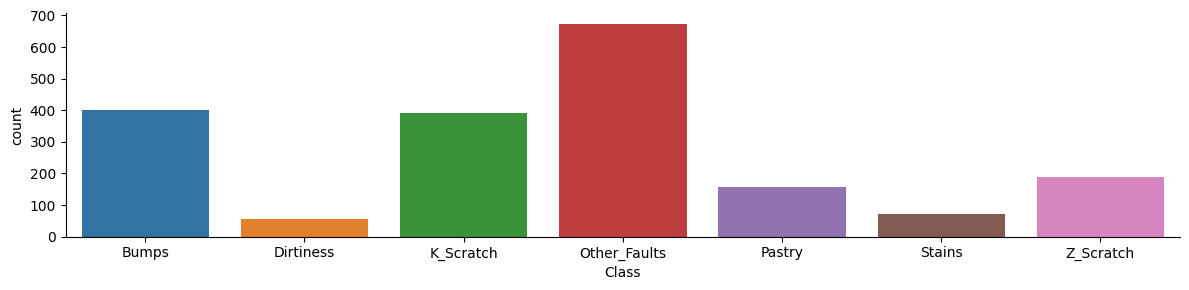

In [114]:
sns.catplot(data=data, x='Class', kind='count', height=3, aspect=4)

In [115]:
data['Class'].value_counts()

Other_Faults    673
Bumps           402
K_Scratch       391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: Class, dtype: int64

# 2. Understand the correlation of features

The next step is to find out if there are highly correlated features. Draw a proper visualization to visualize the correlation among all features in your data.

After that, write a comment about 2 correlations that call your attention (values closer to -1 or 1).

In [116]:
data.head(4)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Class
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry


In [124]:
data.groupby(data)['Class']

ValueError: ignored

In [77]:
data.pivot=data.pivot(columns='Class', values='Class')
data.pivot

Class,Bumps,Dirtiness,K_Scratch,Other_Faults,Pastry,Stains,Z_Scratch
0,NaN,NaN,NaN,NaN,Pastry,NaN,NaN
1,NaN,NaN,NaN,NaN,Pastry,NaN,NaN
2,NaN,NaN,NaN,NaN,Pastry,NaN,NaN
3,NaN,NaN,NaN,NaN,Pastry,NaN,NaN
4,NaN,NaN,NaN,NaN,Pastry,NaN,NaN
...,...,...,...,...,...,...,...
1936,NaN,NaN,NaN,Other_Faults,NaN,NaN,NaN
1937,NaN,NaN,NaN,Other_Faults,NaN,NaN,NaN
1938,NaN,NaN,NaN,Other_Faults,NaN,NaN,NaN
1939,NaN,NaN,NaN,Other_Faults,NaN,NaN,NaN


In [111]:
a_pivot = data.pivot(columns='class', values='class')
a_pivot
corr_matrix =a_pivot.corr()
corr_matrix.head()
corr_matrix.loc['Class','Value']

KeyError: ignored

# 3. Empty_Index feature

Generate a visualization that allows you to understand the data distribution of the feature **Empty_Index** by fault type.

In [110]:
data['two_week_lag']=data.groupby(data)['Class'].shfit(periods=14, fill_value=0)
data

ValueError: ignored

# 4. Relationship between Minimum of luminosity and Log of areas

Draw a plot that is able to show the relationship between two numerical features. In this case use **Minimum_of_Luminosity** and **LogOfAreas**. Change the color of each point according to the Fault type (**Class**).

For this visualization, do not consdier records from the class **"Other_Faults"**.

In [127]:
data.corr()

<ipython-input-127-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,...,-0.361160,0.154778,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,...,-0.214930,0.149259,0.271915,0.099253,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,...,0.054165,0.066085,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,...,0.054185,0.066051,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,...,0.588606,-0.294673,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,...,0.517098,-0.293039,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,...,0.209160,-0.195162,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,...,0.658339,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,...,-0.487574,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,...,0.099300,0.093522,-0.167441,-0.124039,0.007672,0.092823,-0.069522,-0.169747,0.870160,-0.039651


we know the Minimum_of_Luminosity and LogOfAreas corr value is = -0.678762

In [136]:
b_pivot = data.pivot(columns='Minimum_of_Luminosity', values='LogOfAreas')

In [137]:
corr_matrix =b_pivot.corr()
corr_matrix

Minimum_of_Luminosity,0,4,6,7,9,11,12,14,15,16,...,175,177,178,179,190,191,192,195,196,203
Minimum_of_Luminosity,,,,,,,,,,,,,,,,,,,,,
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


# 5. Sigmoid of Areas feature

The last output to be evaluated is not a visualization, but a table. The tasks that you should perform as are follows:

1. Create an indicator variable for the **sigmoid of Areas** feature. The condition for the indicator variable is that the value is greater than 0.5.

2. Then you should create a summarization table.
  1.  The table's index should be the fault types.
  2. The table's columns should be the new indicator variable that your created in step (1).
  3. The values that you want to aggregate are **Edges_X_Index** and **Edges_Y_Index**. Use the median value as a aggregation function.

